In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Mall_customers.csv")
print(data.shape)

(200, 5)


In [3]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = data.rename_axis(None, axis=1)

In [4]:
print(data[:3])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6


In [5]:
data = np.array(data)
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data[:3])



[[-1.7234121  -1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.70609137 -1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-1.68877065  0.88640526 -1.3528021  -1.70082976 -1.71591298]]


In [6]:


class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, X):
        self.labels = np.full(X.shape[0], -1)  
        cluster_id = 0

        for i in range(X.shape[0]):
            if self.labels[i] != -1:
                continue

            neighbors = self.find_neighbors(X, i)

            if len(neighbors) < self.min_samples:
                self.labels[i] = 0  
            else:
                cluster_id += 1
                self.expand_cluster(X, i, neighbors, cluster_id)

    def find_neighbors(self, X, index):
        neighbors = []
        for i in range(X.shape[0]):
            if np.linalg.norm(X[index] - X[i]) < self.eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, X, index, neighbors, cluster_id):
        self.labels[index] = cluster_id

        for neighbor in neighbors:
            if self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_id
                new_neighbors = self.find_neighbors(X, neighbor)

                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)

    def get_labels(self):
        return self.labels




# #initialize and fit DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=6)
# dbscan.fit(data)
# cluster_labels = dbscan.get_labels()


# plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
# plt.title('DBSCAN Without PCA')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()

Number of components: 1, Variance explained: 39.70%


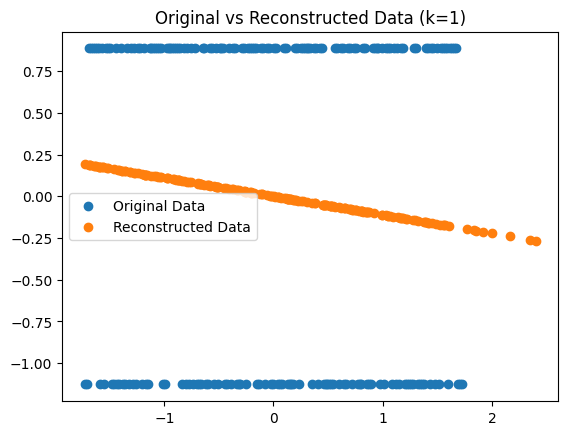

Number of components: 2, Variance explained: 66.65%


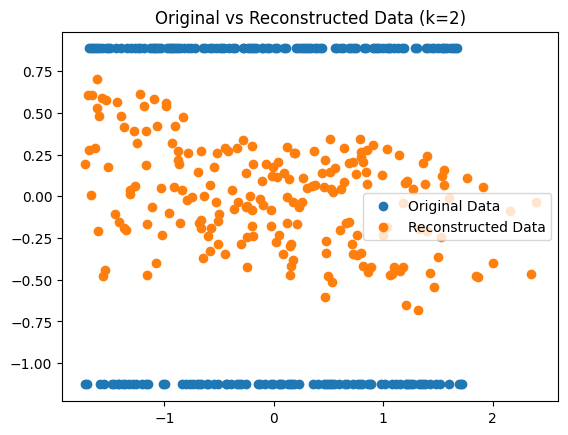

Number of components: 3, Variance explained: 86.10%


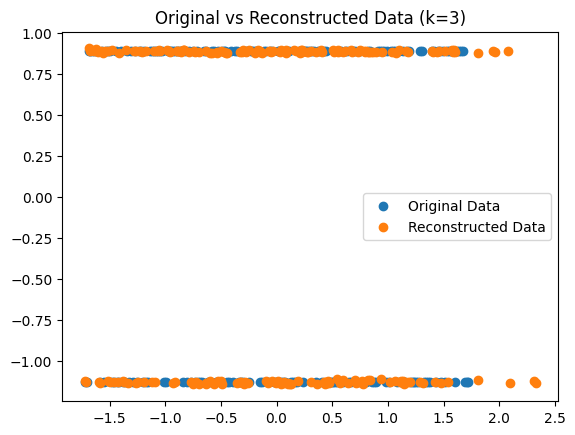

Number of components: 4, Variance explained: 99.55%


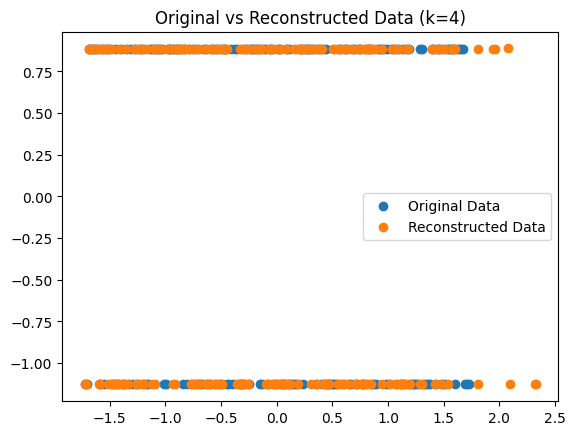

Number of components: 5, Variance explained: 100.00%


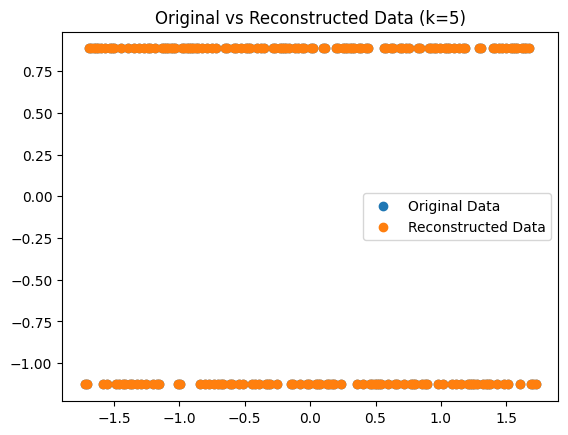

In [8]:

cov_matrix = np.cov(data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k_list = []
var_list = []
mean = np.mean(data, axis=0)
for k in range(1,6):
    q_matrix = eigenvectors[:, :k]

    pca_result = data.dot(q_matrix)

    reconstructed_data = pca_result.dot(q_matrix.T) + mean

    explained_variance_ratio = np.sum(eigenvalues[:k]) / np.sum(eigenvalues)
    print(f"Number of components: {k}, Variance explained: {explained_variance_ratio * 100:.2f}%")
    k_list.append(k)
    var_list.append(explained_variance_ratio)
    
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], label='Original Data')
    plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')
    plt.title(f'Original vs Reconstructed Data (k={k})')
    plt.legend()
    plt.show()


[0.3970189375421867, 0.6665065869634227, 0.8609811888296223, 0.9955312540700099, 1.0]
['1', '2', '3', '4', '5']


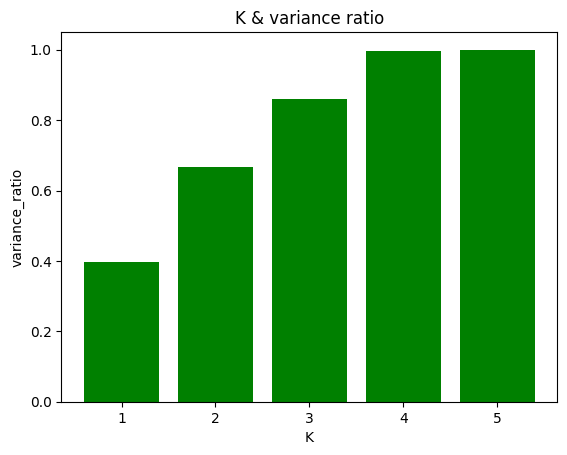

In [9]:

for i in range(len(k_list)):
    k_list[i] = str(k_list[i])
print(var_list)
print(k_list)


import matplotlib.pyplot as plt
categories = k_list
values = var_list
plt.bar(categories, values, color='green')
plt.xlabel('K')
plt.ylabel('variance_ratio')
plt.title('K & variance ratio')
plt.show()



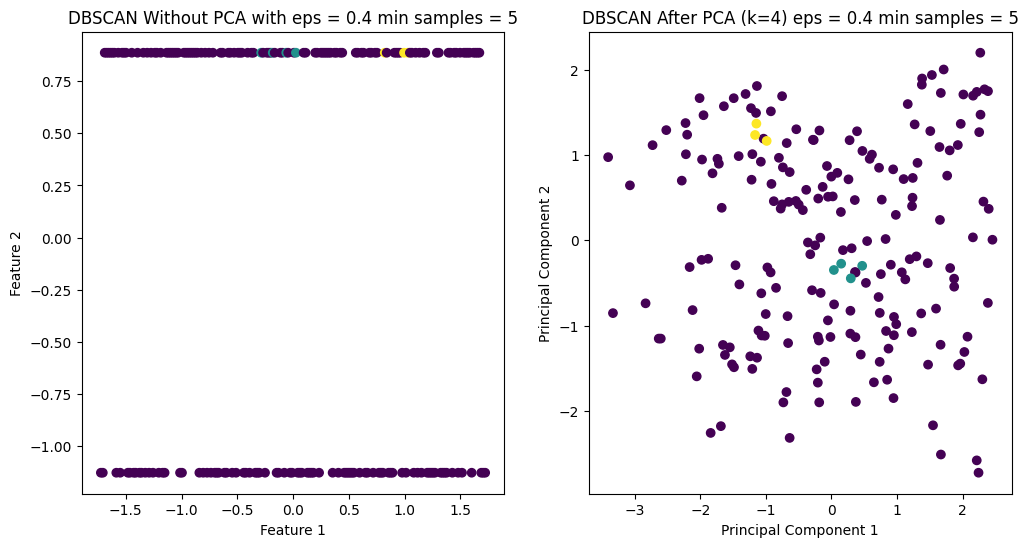

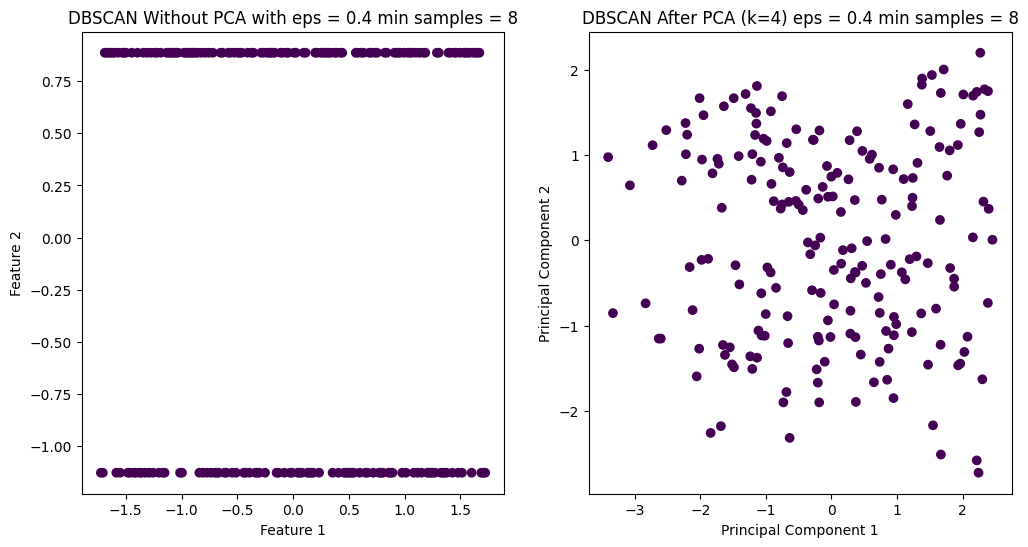

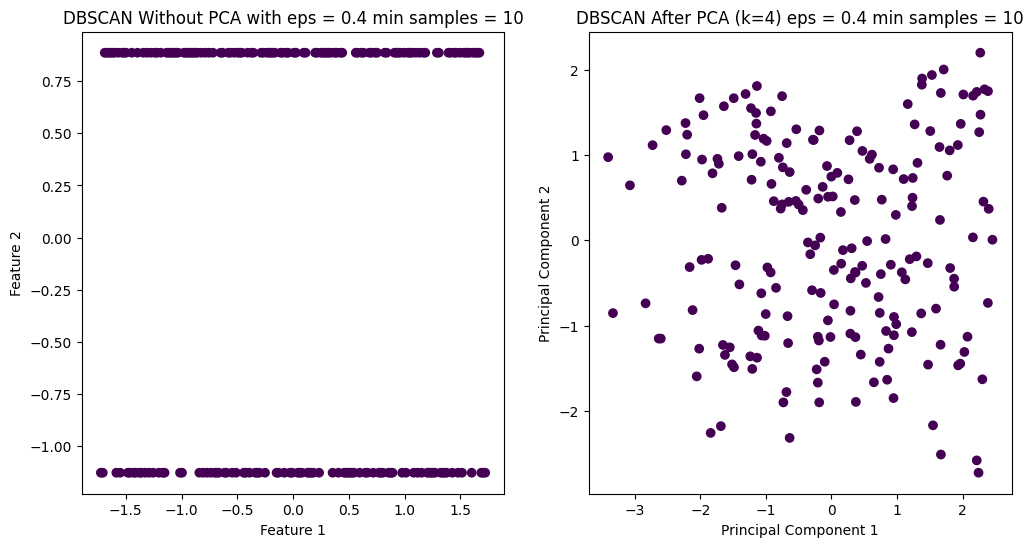

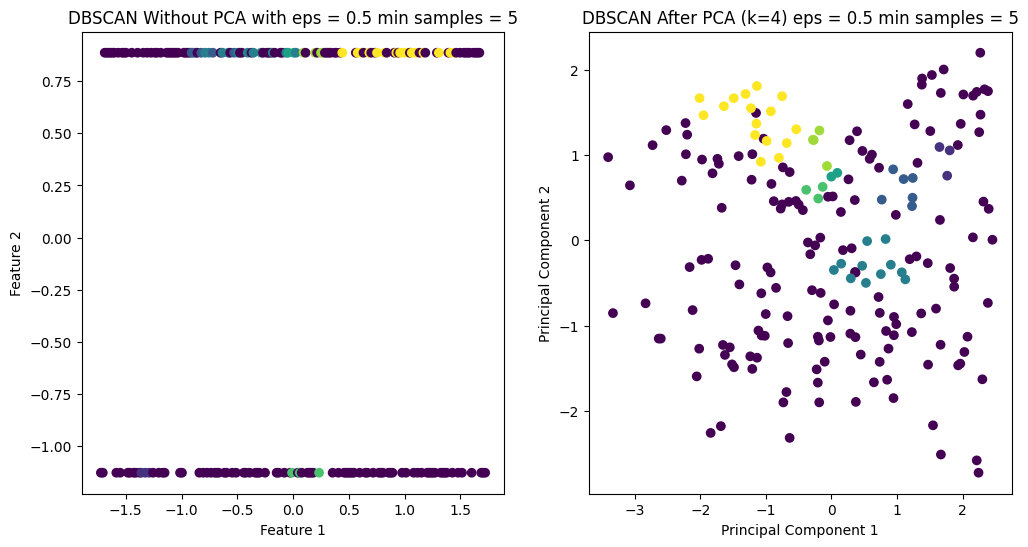

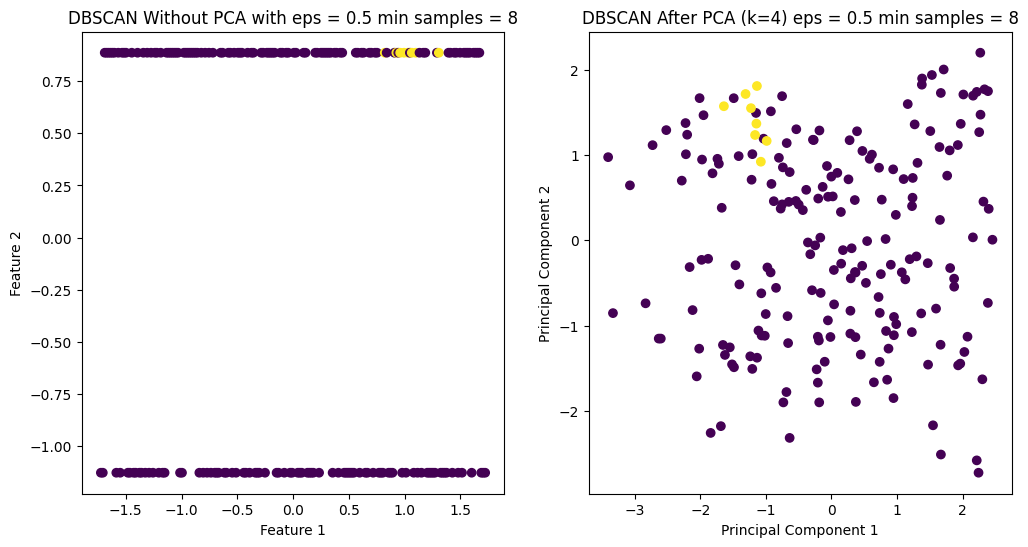

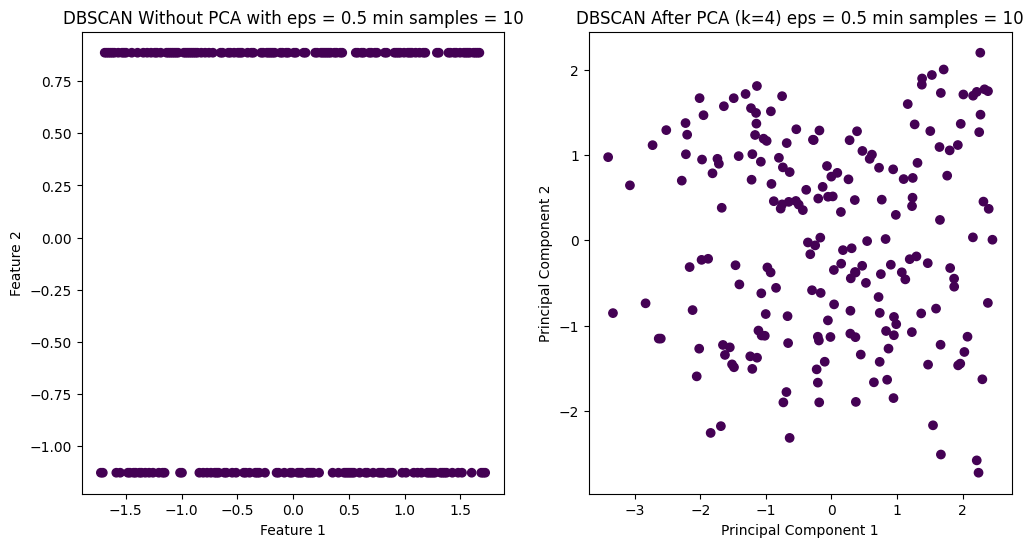

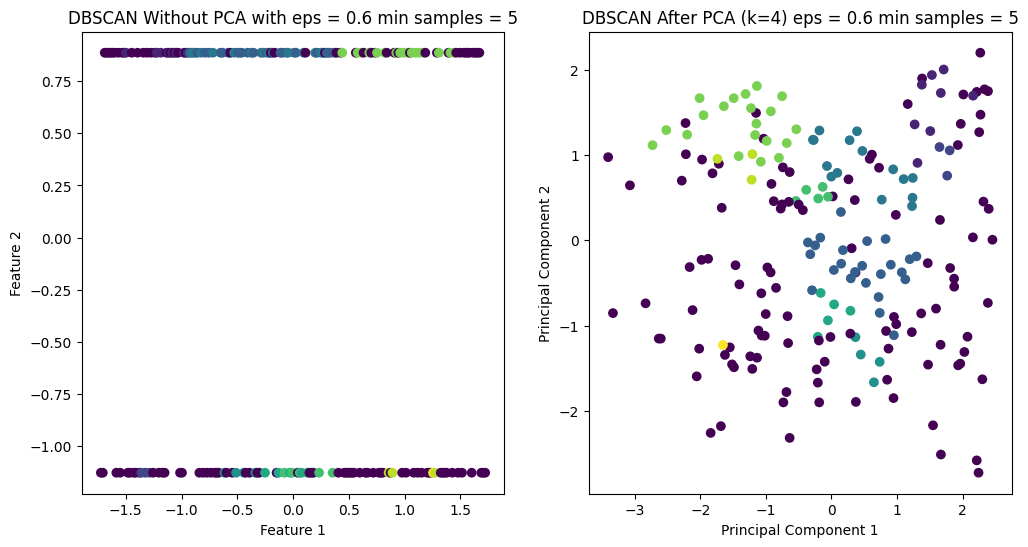

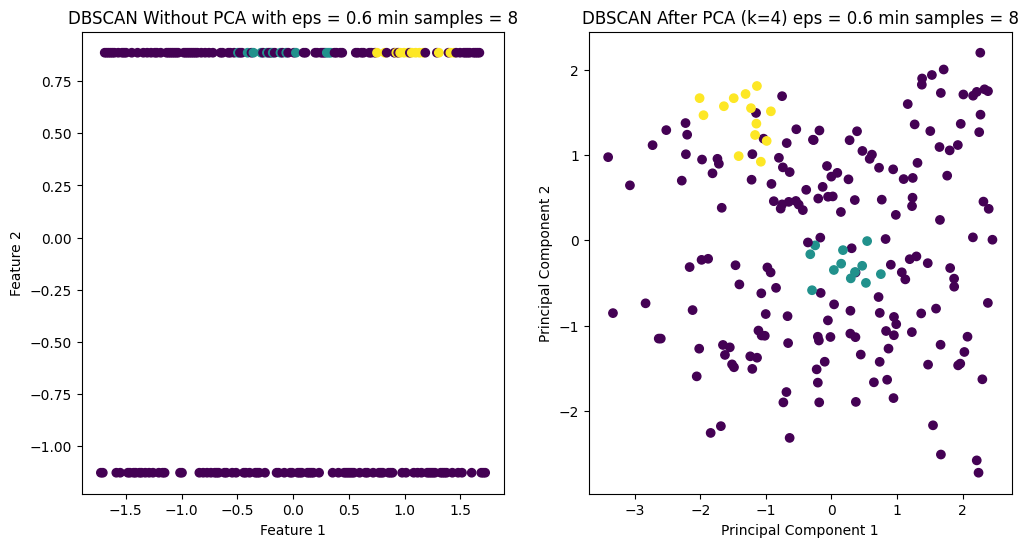

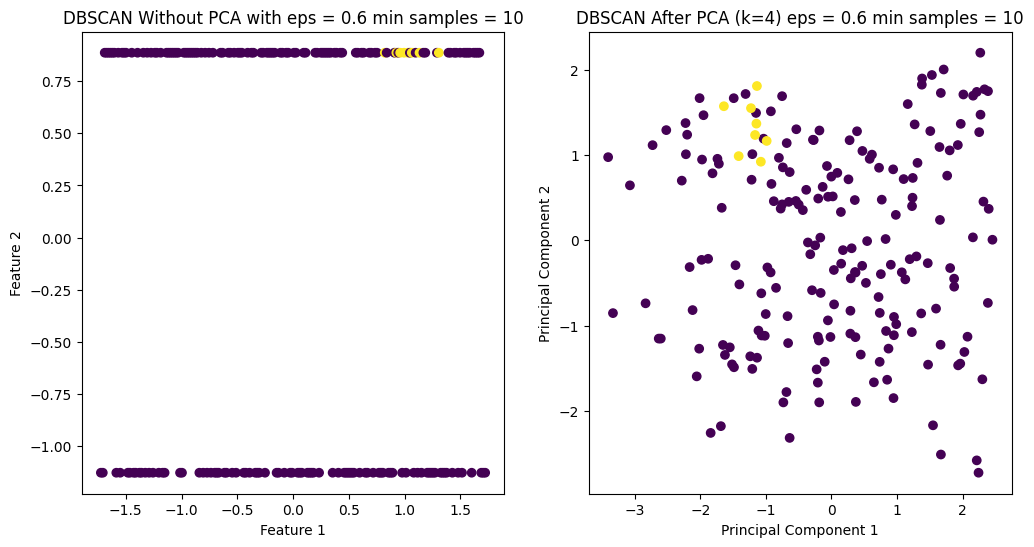

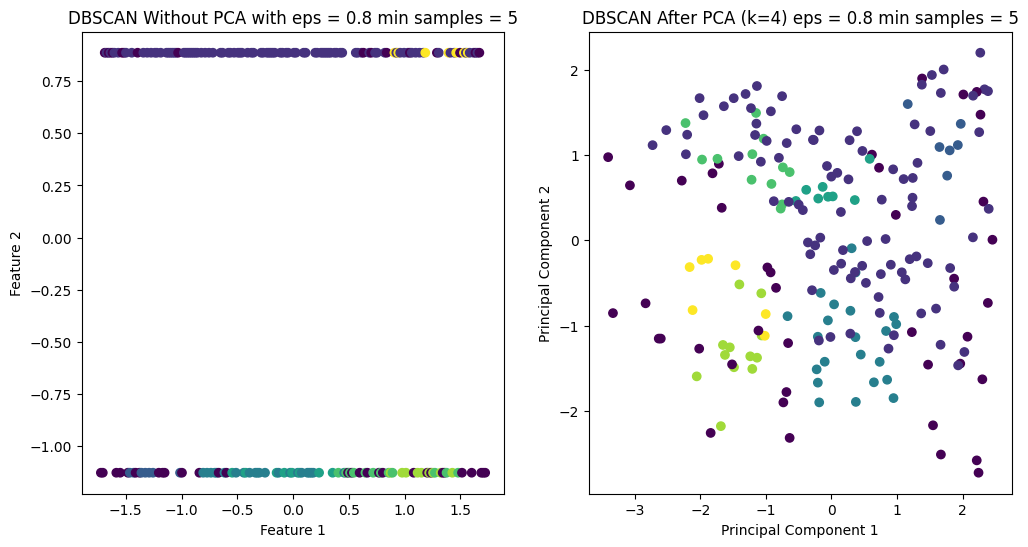

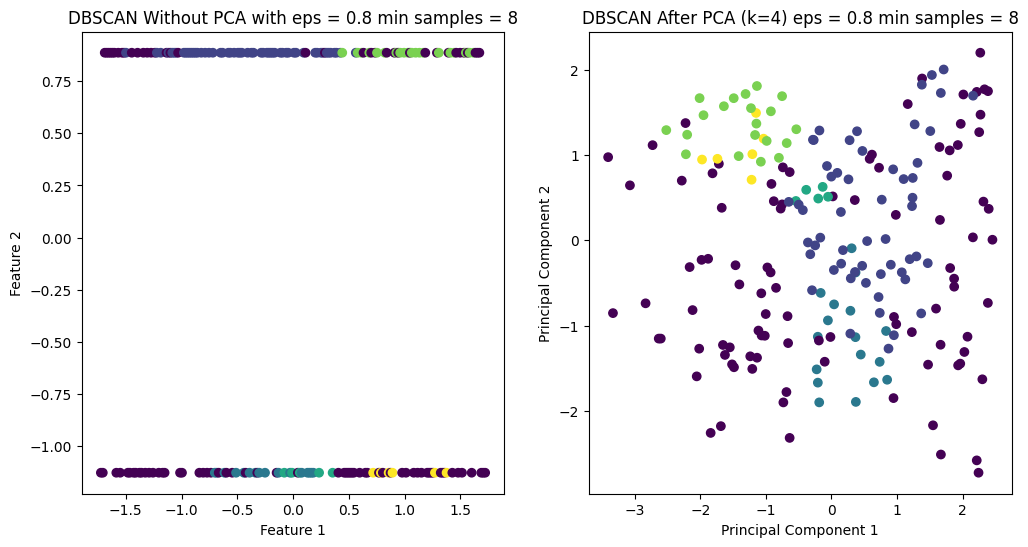

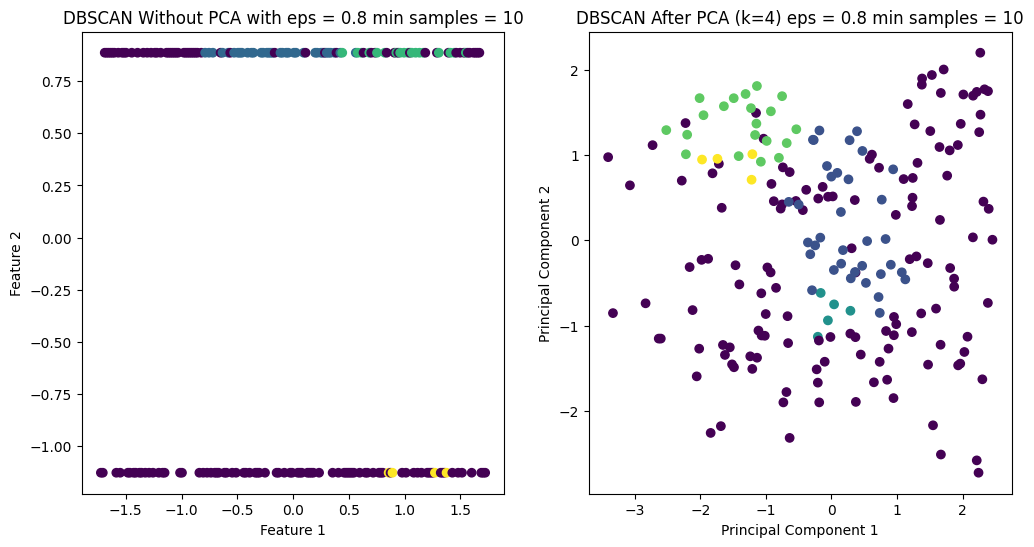

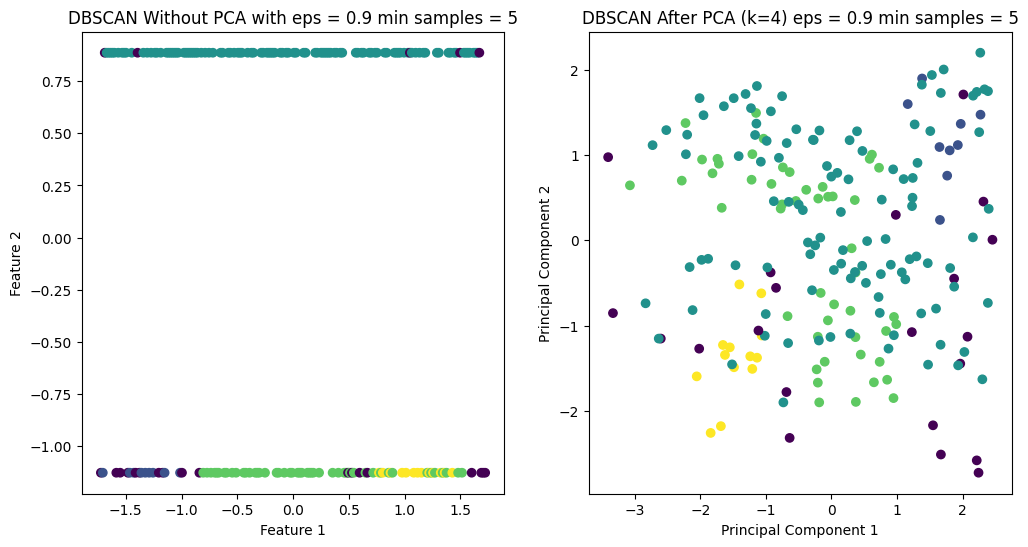

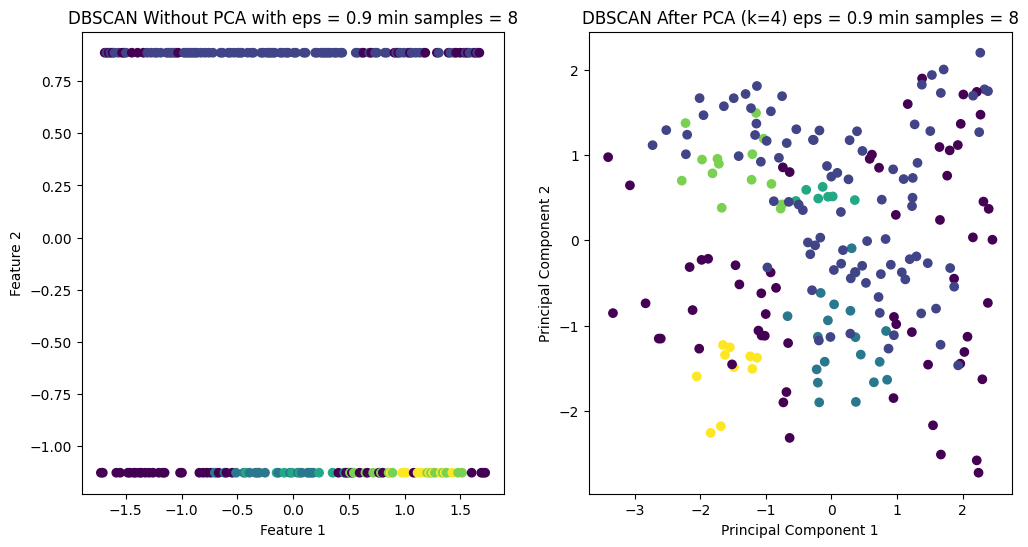

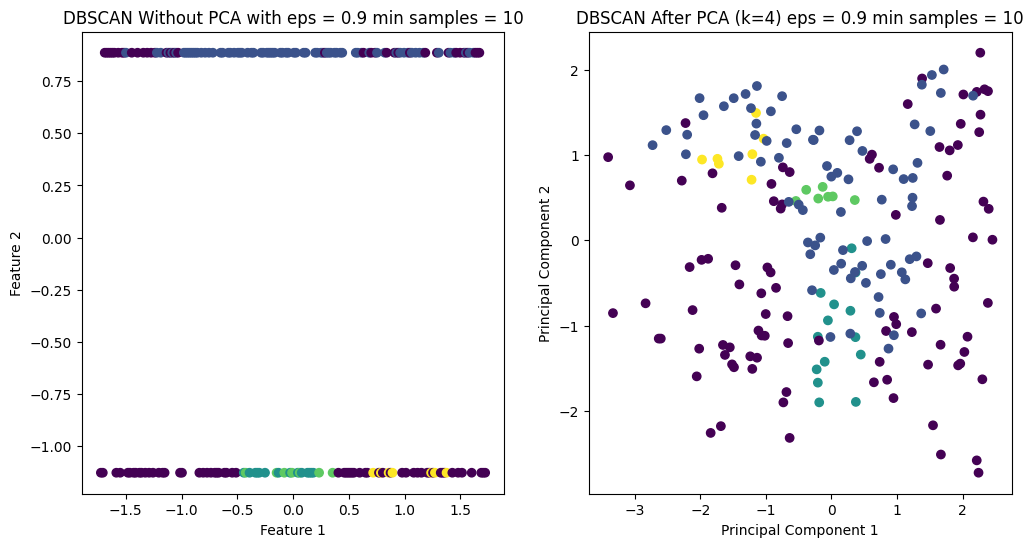

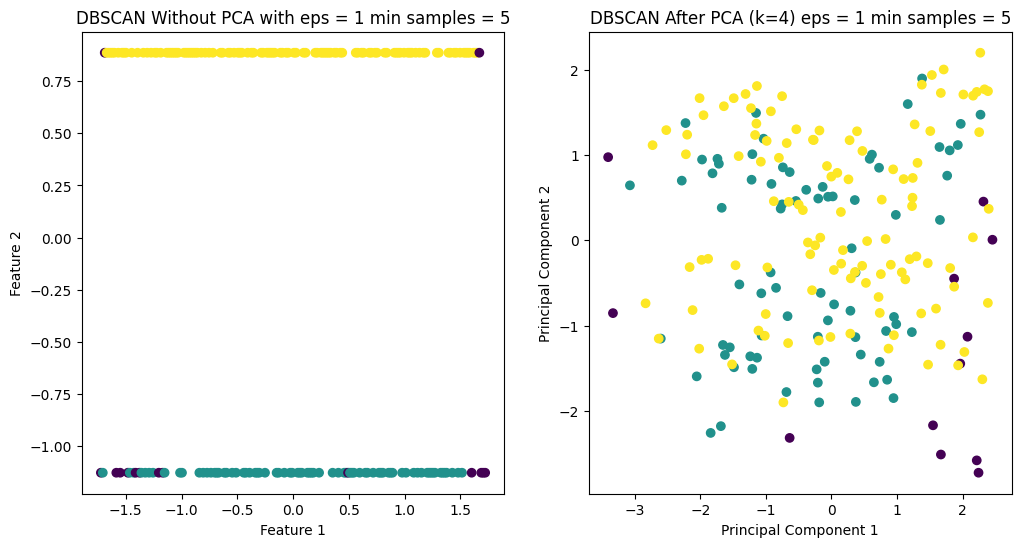

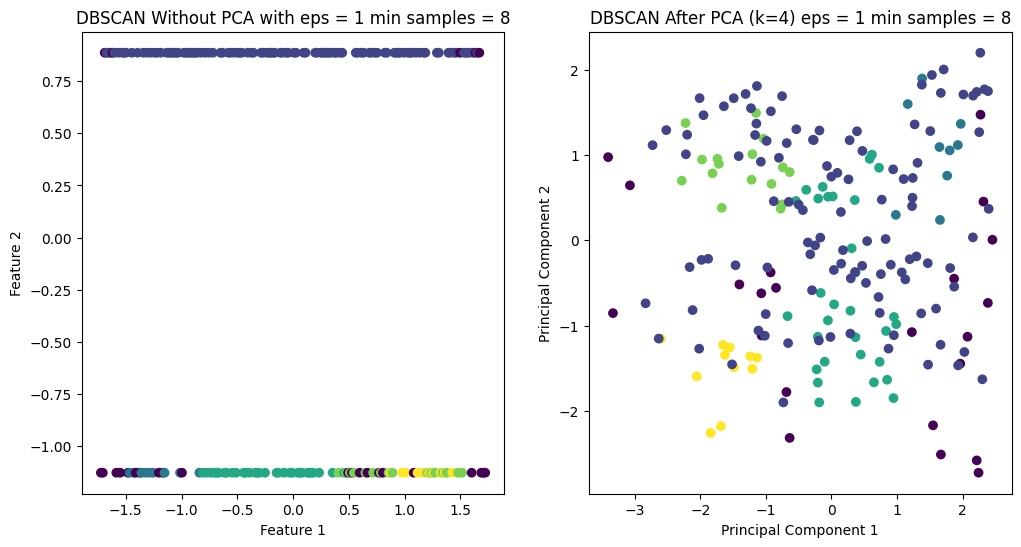

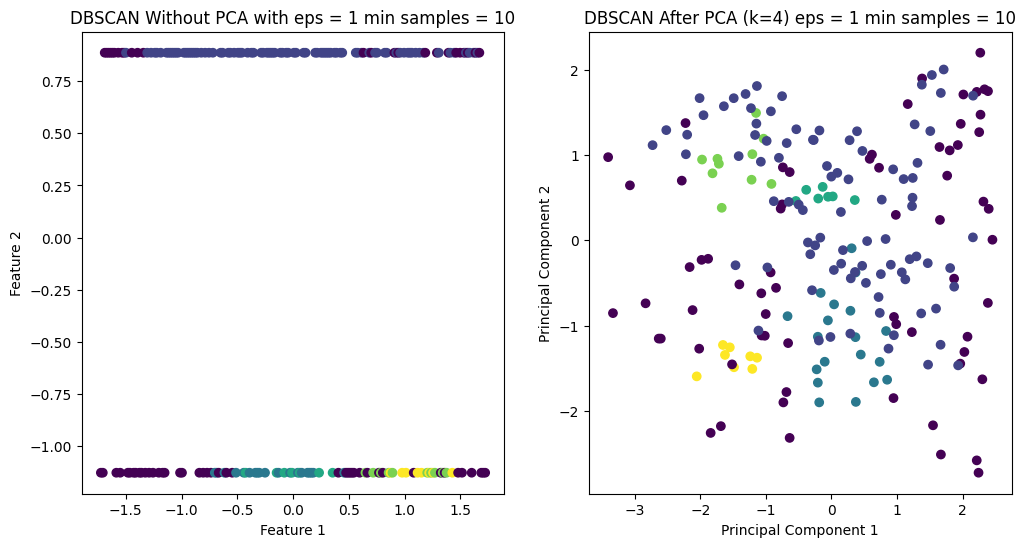

In [11]:
epss = [0.4,0.5,0.6,0.8, 0.9, 1]
min_sample_list = [5, 8, 10]


for i in epss:
    for j in min_sample_list:
        trainData = data
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(trainData)
        cluster_labels_before_pca = dbscan.get_labels()
        
        #PCA with best q_matrix
        best_k = 4
        q_matrix = eigenvectors[:, :best_k]
        pca_result = trainData.dot(q_matrix)
        
        #DBSCAN after PCA
        dbscan_after_pca = DBSCAN(eps=i, min_samples=j)
        dbscan_after_pca.fit(pca_result)
        cluster_labels_after_pca = dbscan_after_pca.get_labels()
        
        #visualize before and after PCA
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.scatter(data[:, 0], data[:, 1], c=cluster_labels_before_pca, cmap='viridis')
        plt.title(f'DBSCAN Without PCA with eps = {i} min samples = {j}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        
        plt.subplot(1, 2, 2)
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels_after_pca, cmap='viridis')
        plt.title(f'DBSCAN After PCA (k={best_k}) eps = {i} min samples = {j}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        
        plt.show()